# <h1 align="center"><font color="red">Real Datasets</font></h1>

<font color="pink">Senior Data Scientist.: Dr. Eddy Giusepe Chirinos Isidro</font>

Um exemplo de `ClassificationThesholdTuner` com classificadores reais em conjuntos de dados reais. Os classificadores não são ajustados aqui, e podemos encontrar diferentes limiares ideais com modelos bem ajustados.

# <font color="blue">Breast Cancer</font>

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import sys
sys.path.append('..') # Então, ao usar sys.path.append('..'), você está dizendo ao Python para adicionar o diretório pai 
# do diretório atual ao caminho de busca de módulos (o sys.path), permitindo que você importe módulos que estão localizados no nível superior ao do arquivo que está rodando.
from threshold_tuner import ClassificationThresholdTuner

In [2]:
# Este é um conjunto de dados de classificação binária. 
from sklearn.datasets import load_breast_cancer

np.random.seed(0)

data = load_breast_cancer()
df = pd.DataFrame(data.data)
df.columns = data.feature_names
y_true = data.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 30)

In [4]:
target_classes = pd.Series(y_true).unique()
target_classes

array([0, 1])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df, y_true, test_size=0.30, random_state=42)

In [6]:
clf = RandomForestClassifier(max_depth=1, random_state=0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_pred_proba = clf.predict_proba(X_test)

In [7]:
y_pred_proba[:4]

array([[0.15551965, 0.84448035],
       [0.91703005, 0.08296995],
       [0.88967277, 0.11032723],
       [0.13469026, 0.86530974]])

In [8]:
tuner = ClassificationThresholdTuner()
tuner

,Metric,0,1,Macro
0,Precision,1.000000,0.931034,0.965517
0,Recall,0.873016,1.000000,0.936508
0,F1,0.932203,0.964286,0.948245


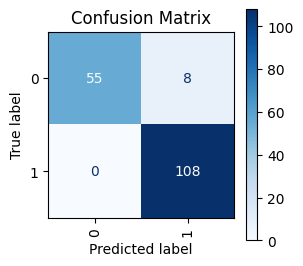

,Metric,Score
0,Brier Score,0.047883
1,AUROC,0.993313


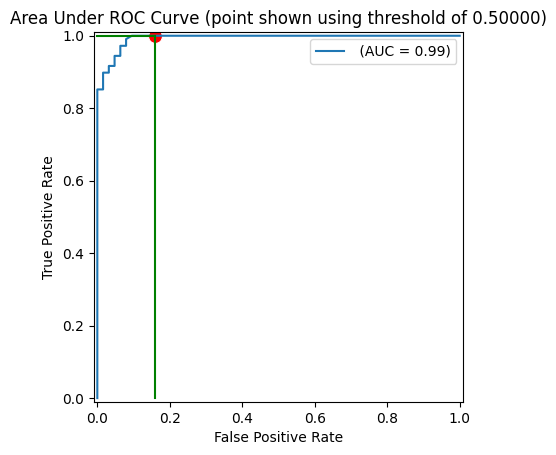

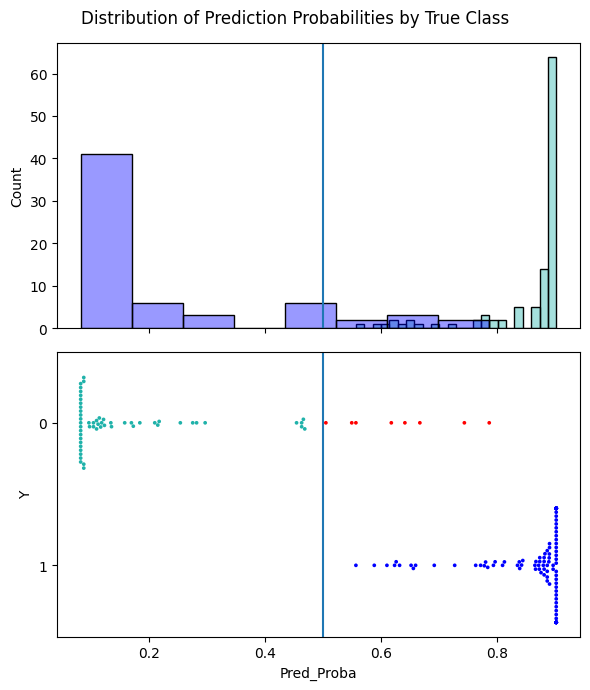

In [9]:
import warnings
warnings.filterwarnings("ignore")

# Primeiro, analisamos as métricas usando o limite padrão de 0,5.
tuner.print_stats_proba(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba,
    default_class=None,
    thresholds=None
)  

100%|██████████| 9/9 [00:04<00:00,  1.91it/s]


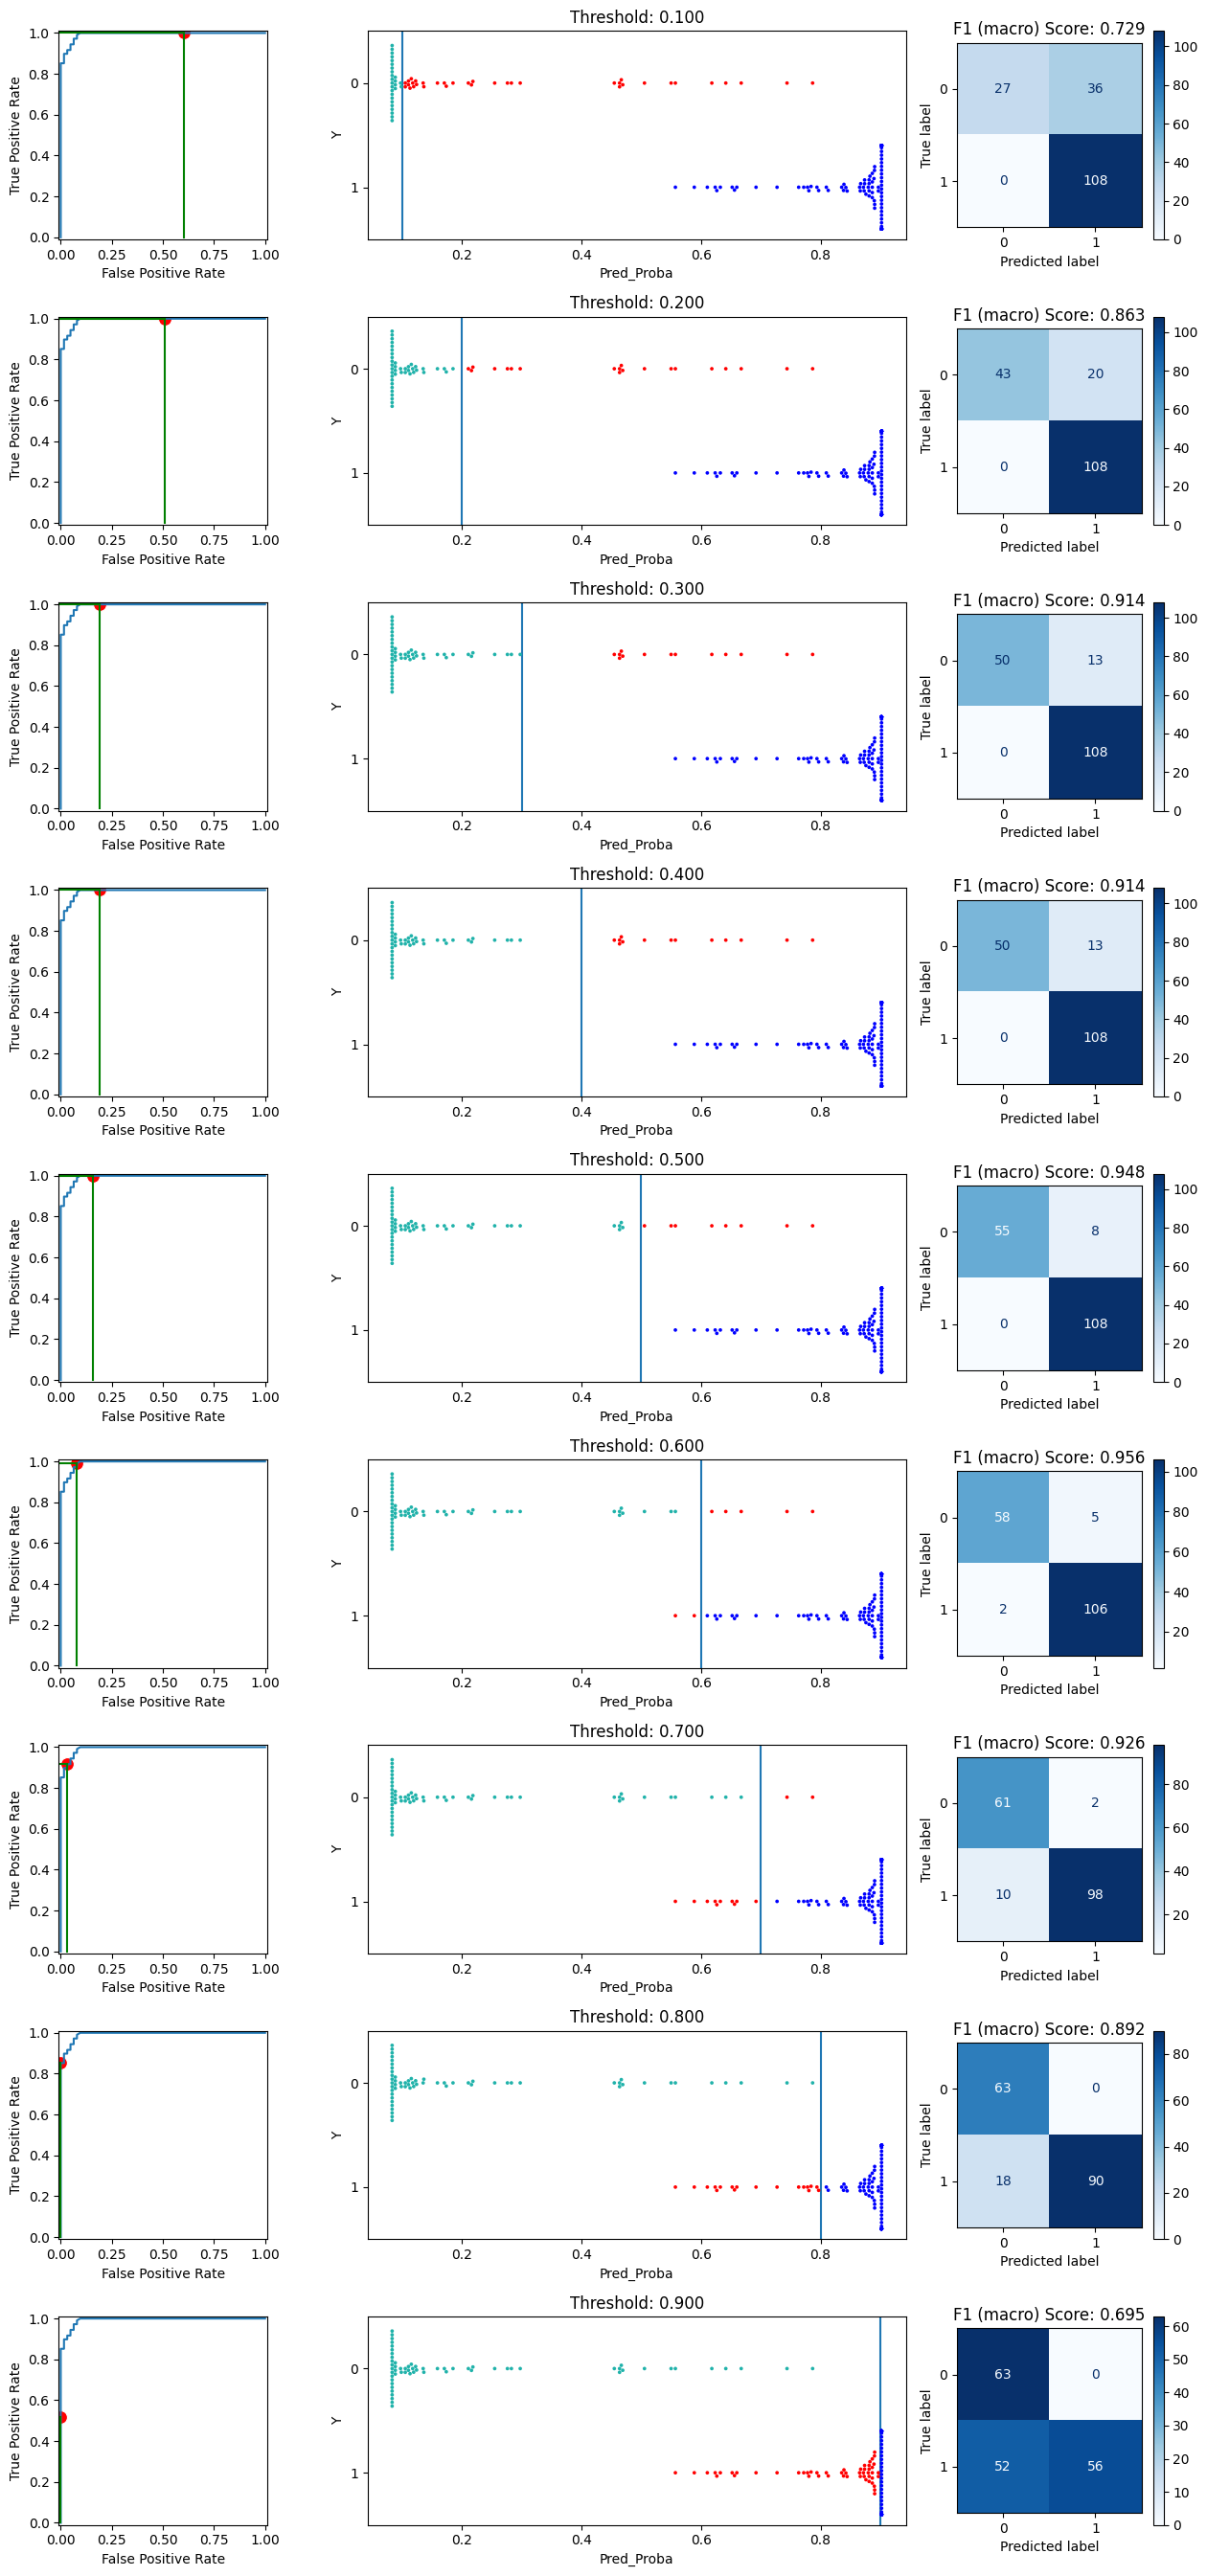

In [10]:
tuner.plot_by_threshold(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba)


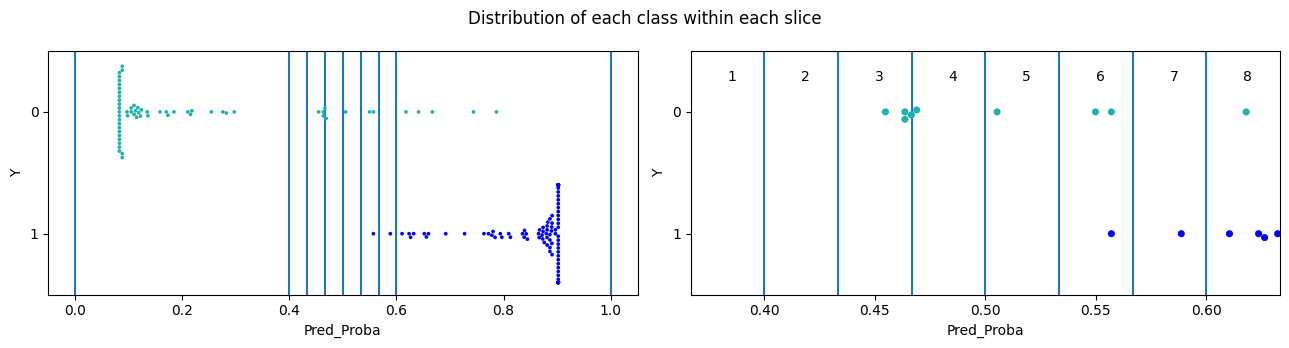

,Slice,Min Prob,Max Prob,1,0,Total,Fraction 1,Fraction 0
0,1,0.000000,0.400000,0,50,50,0.000000,1.000000
1,2,0.400000,0.433333,0,0,0,NaN,NaN
2,3,0.433333,0.466667,0,4,4,0.000000,1.000000
3,4,0.466667,0.500000,0,1,1,0.000000,1.000000
4,5,0.500000,0.533333,0,1,1,0.000000,1.000000
5,6,0.533333,0.566667,1,2,3,0.333333,0.666667
6,7,0.566667,0.600000,1,0,1,1.000000,0.000000
7,8,0.600000,1.000000,106,5,111,0.954955,0.045045


In [11]:
tuner.describe_slices(    
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba, 
    start=0.4, end=0.6, num_slices=6)

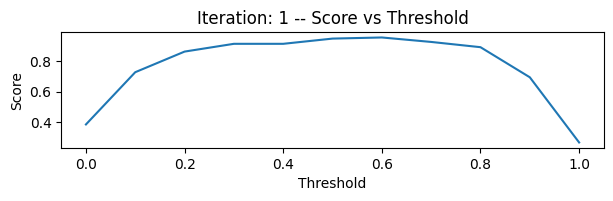

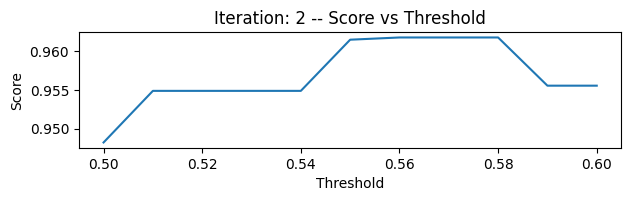

0.5700000000000001

In [12]:
from sklearn.metrics import f1_score

best_threshold = tuner.tune_threshold(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba, 
    metric=f1_score,
    average='macro',
    higher_is_better=True,
    max_iterations=5
)


best_threshold

In [13]:
tuned_pred = tuner.get_predictions(target_classes, y_pred_proba, None, best_threshold)

# Exibir as primeiras 10 previsões:
tuned_pred[:10]

['1', '0', '0', '1', '1', '0', '0', '0', '0', '1']

,Metric,0,1,Macro
0,Precision,0.983051,0.955357,0.969204
0,Recall,0.920635,0.990741,0.955688
0,F1,0.950820,0.972727,0.961773


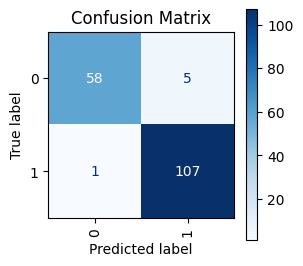

,Metric,Score
0,Brier Score,0.047883
1,AUROC,0.993313


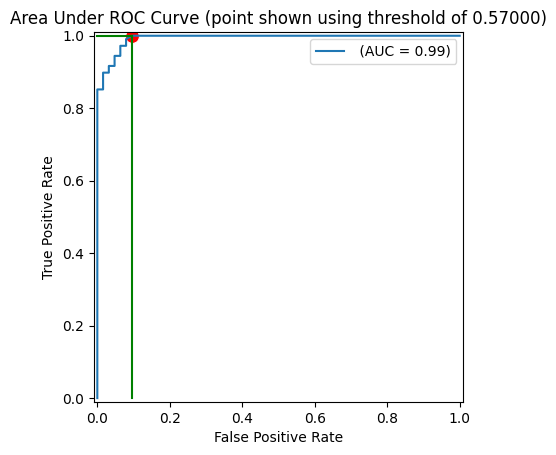

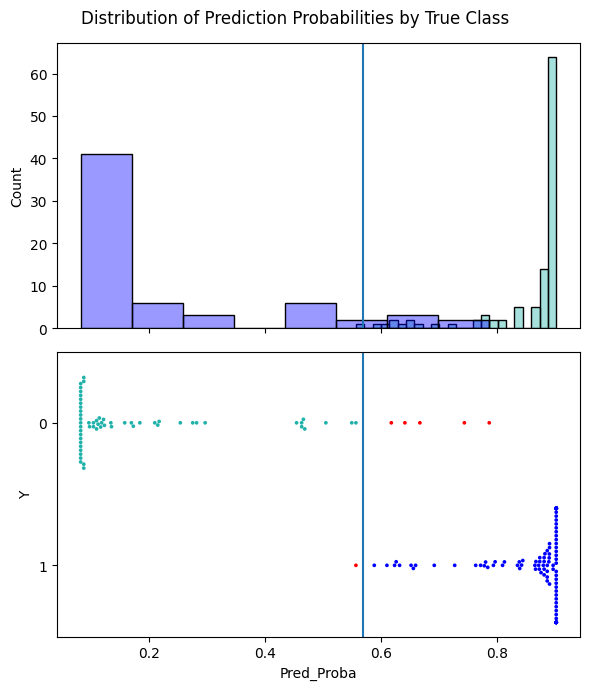

In [14]:
# A F1 macro score usando o best_threshold melhorou de 0,928 para 0,953:

tuner.print_stats_proba(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba, 
    thresholds=best_threshold
)  

# <font color="gree">Steel Plates Fault (Falha em placas de aço)</font>

In [15]:
from sklearn.datasets import fetch_openml

np.random.seed(0)

data = fetch_openml("steel-plates-fault", version=1, parser='auto') 
df = pd.DataFrame(data['data'])
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33
0,42,50,270900,270944,267,17,44,24220,76,108,...,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0


In [16]:
df.shape

(1941, 33)

In [17]:
target_classes = ['1', '2']

In [18]:
y_true = data['target']
y_true.value_counts()

Class
1    1268
2     673
Name: count, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df, y_true, test_size=0.30, random_state=42)

clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

tuner = ClassificationThresholdTuner()

,Metric,1,2,Macro
0,Precision,0.816964,0.985185,0.901075
0,Recall,0.994565,0.618605,0.806585
0,F1,0.897059,0.760000,0.828529


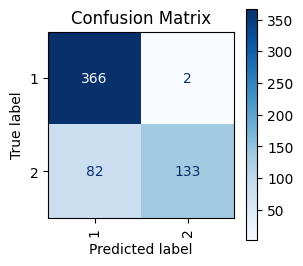

,Metric,Score
0,Brier Score,0.137639
1,AUROC,0.984277


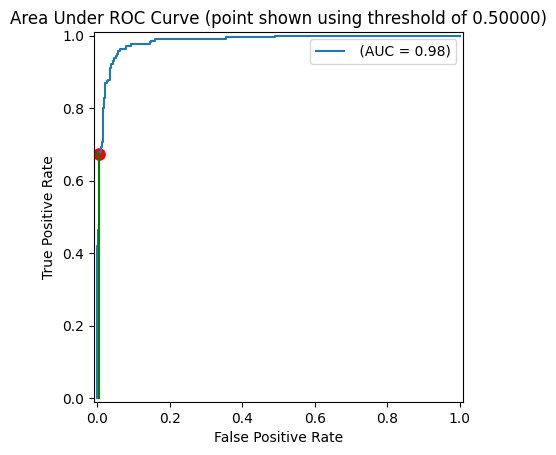

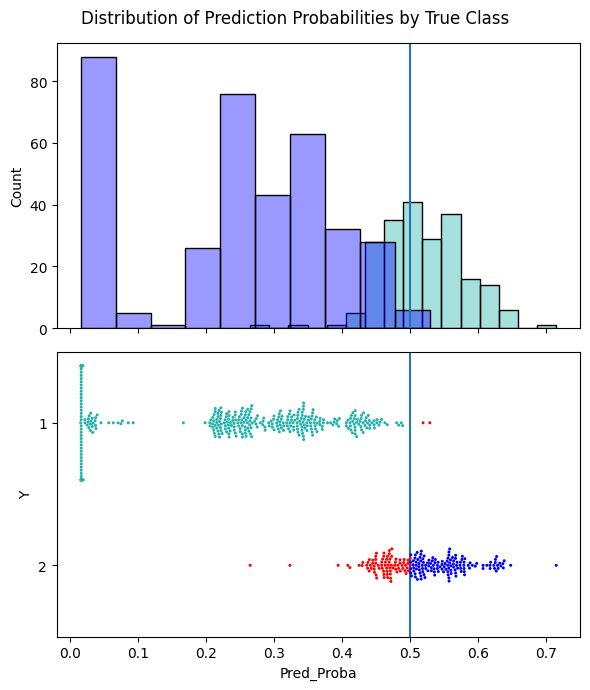

In [20]:
# Primeiro, analisamos as métricas usando o limite padrão de 0,5:

tuner.print_stats_proba(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba,
    default_class=None,
    thresholds=None
)  

,Start Range %,End Range %,Min Probability,Max Probability,Count 1,Count 2,Total Count,Precision,Recall,Cumulative Count 2,Cumulative Total Count,Cumulative Precision,Cumulative Recall
0,0.9,1.0,0.556748,0.647557,0,58,58,1.000000,0.269767,58,58,1.000000,0.269767
1,0.8,0.9,0.510995,0.556694,2,56,58,0.965517,0.260465,114,116,0.982759,0.530233
2,0.7,0.8,0.468886,0.510391,4,54,58,0.931034,0.251163,168,174,0.965517,0.781395
3,0.6,0.7,0.431197,0.467449,21,38,59,0.644068,0.176744,206,233,0.884120,0.958140
4,0.5,0.6,0.359584,0.430654,52,6,58,0.103448,0.027907,212,291,0.728522,0.986047
5,0.4,0.5,0.319722,0.358509,57,1,58,0.017241,0.004651,213,349,0.610315,0.990698
6,0.3,0.4,0.257384,0.319074,58,1,59,0.016949,0.004651,214,408,0.524510,0.995349
7,0.2,0.3,0.218476,0.257241,58,0,58,0.000000,0.000000,214,466,0.459227,0.995349
8,0.1,0.2,0.017405,0.217829,55,0,55,0.000000,0.000000,214,521,0.410749,0.995349
9,0.0,0.1,0.015280,0.017226,61,0,61,0.000000,0.000000,214,582,0.367698,0.995349


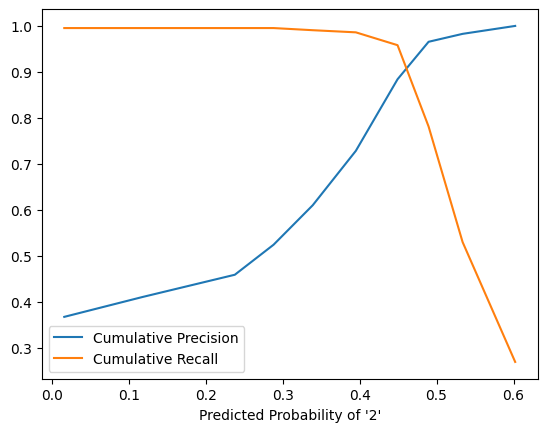

In [21]:
tuner.print_stats_table(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba
)

100%|██████████| 9/9 [00:07<00:00,  1.21it/s]


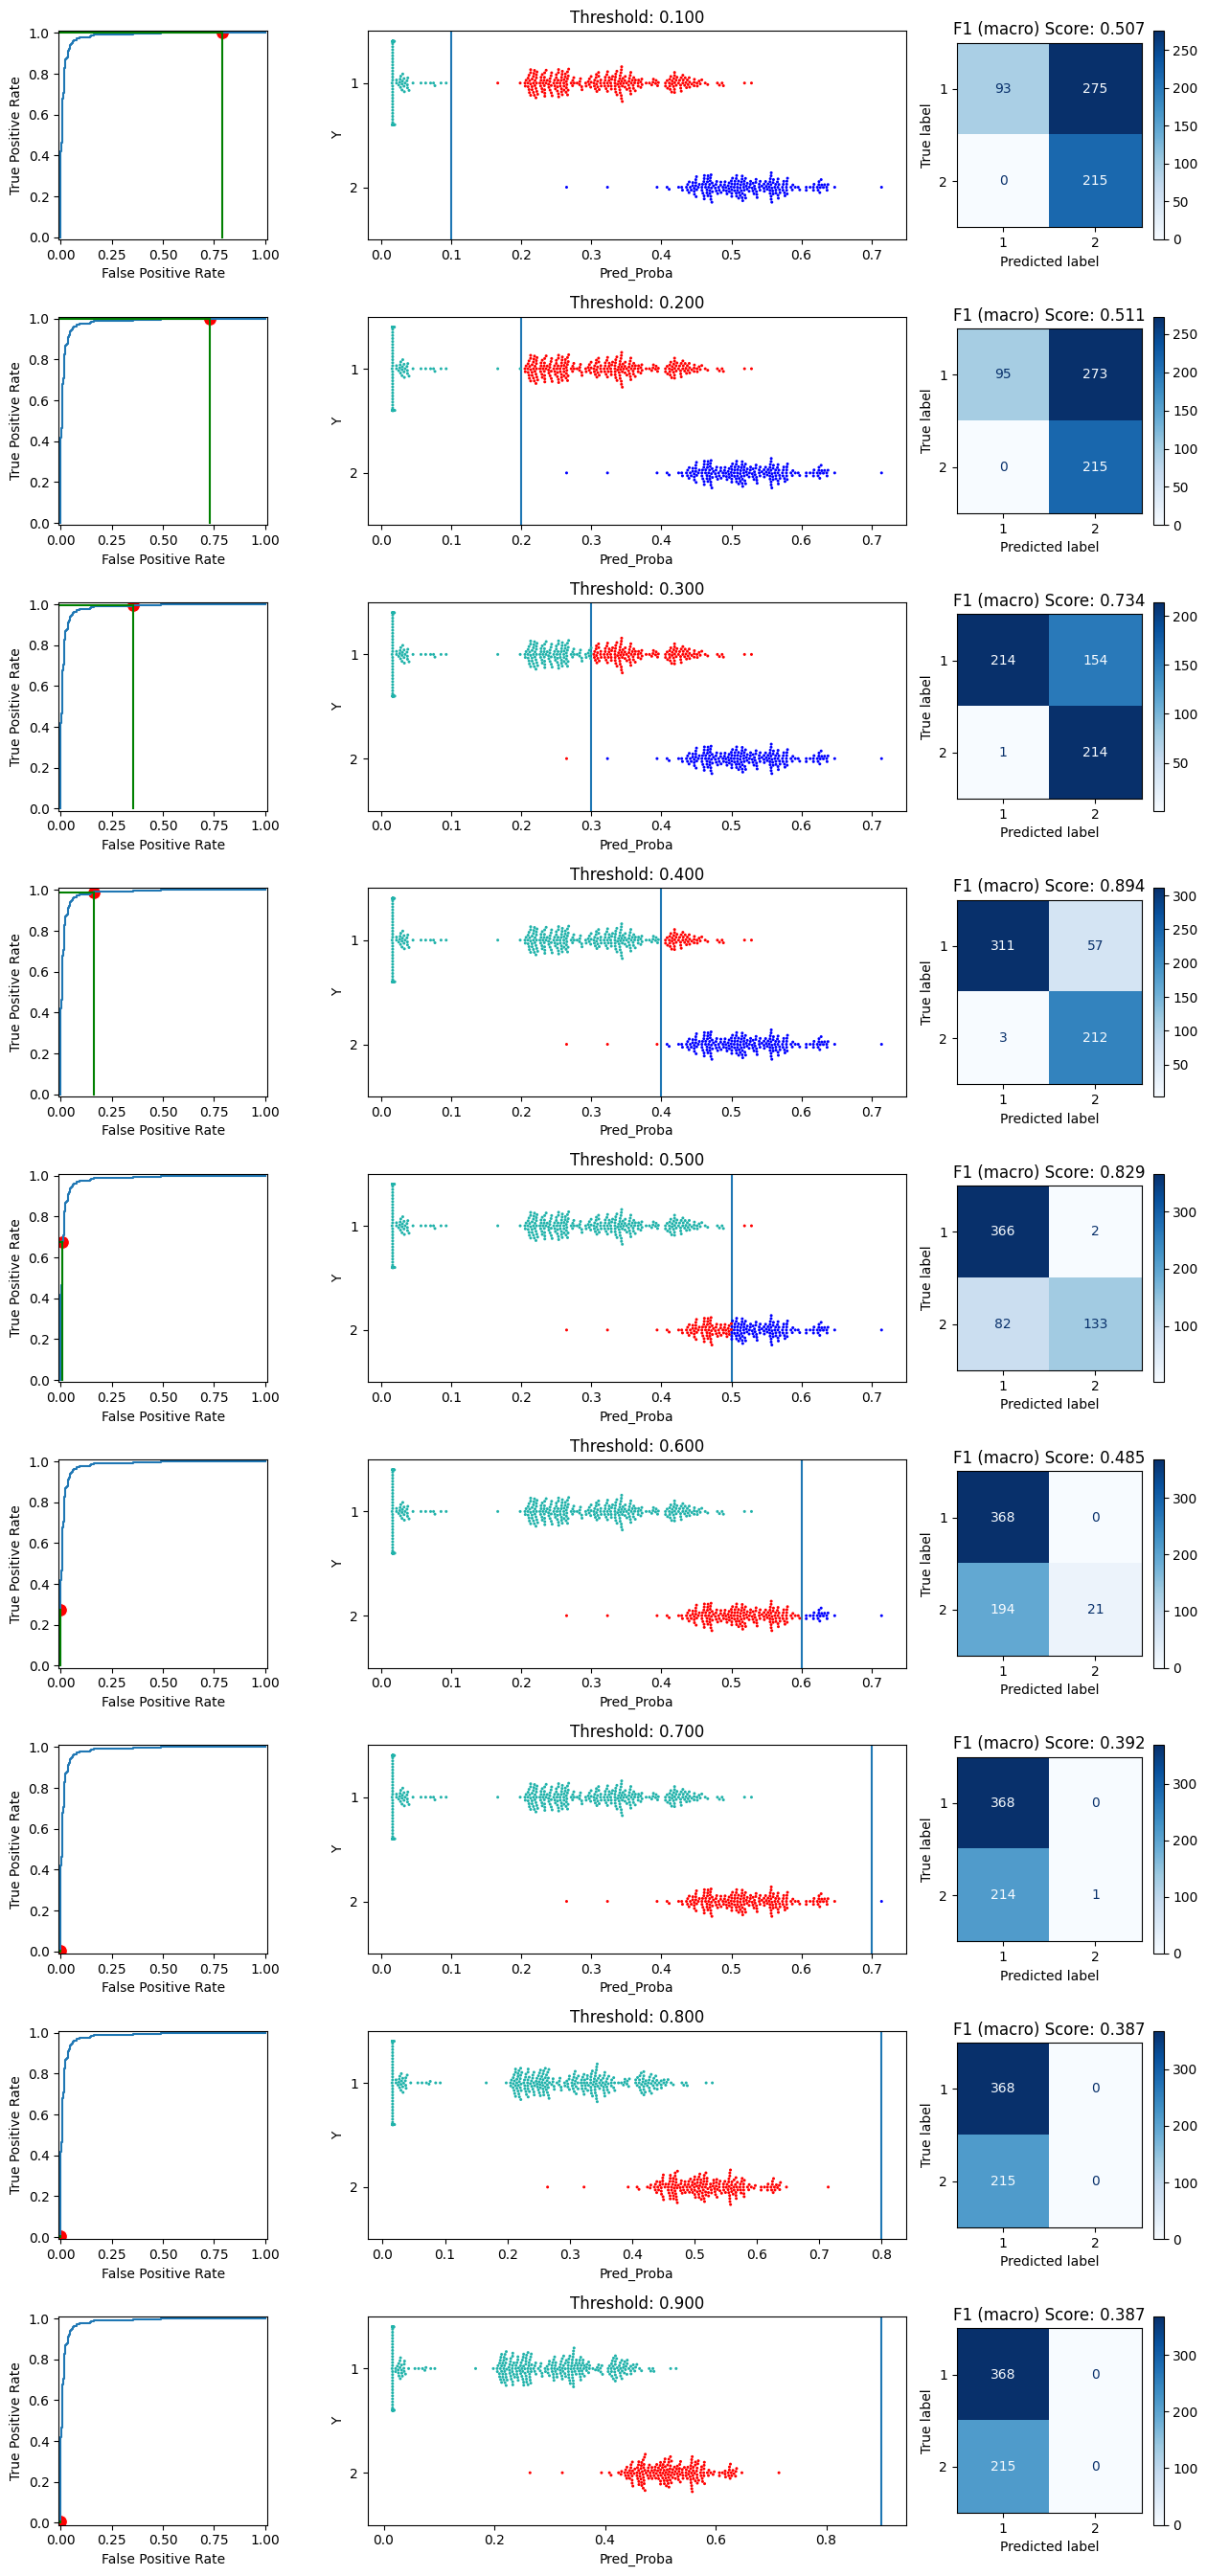

In [22]:
tuner.plot_by_threshold(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba)

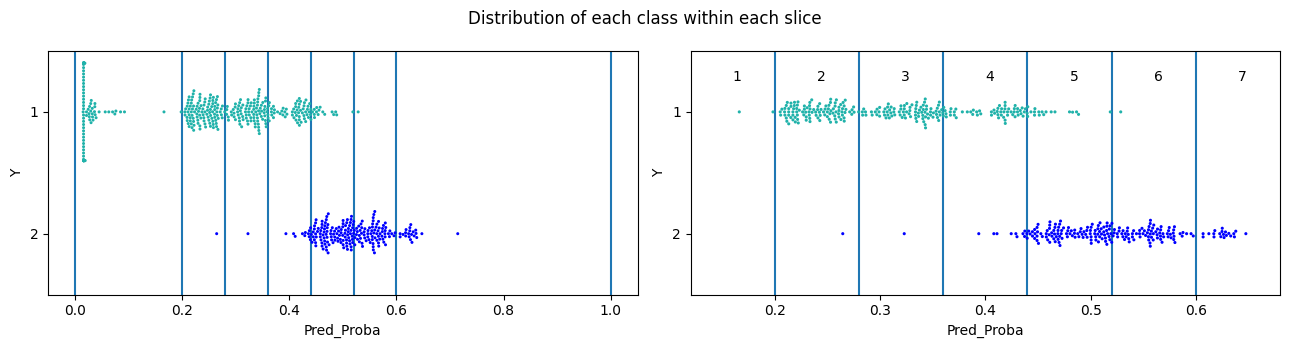

,Slice,Min Prob,Max Prob,2,1,Total,Fraction 2,Fraction 1
0,1,0.00,0.20,0,95,95,0.000000,1.000000
1,2,0.20,0.28,1,106,107,0.009346,0.990654
2,3,0.28,0.36,1,89,90,0.011111,0.988889
3,4,0.36,0.44,11,59,70,0.157143,0.842857
4,5,0.44,0.52,103,18,121,0.851240,0.148760
5,6,0.52,0.60,78,1,79,0.987342,0.012658
6,7,0.60,1.00,21,0,21,1.000000,0.000000


In [23]:
tuner.describe_slices(    
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba, 
    start=0.2, end=0.6, num_slices=5)


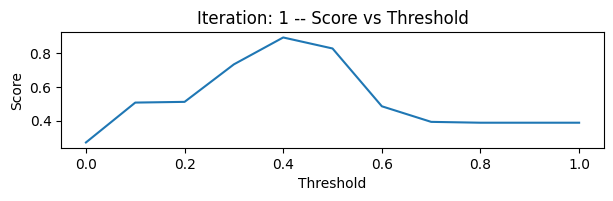

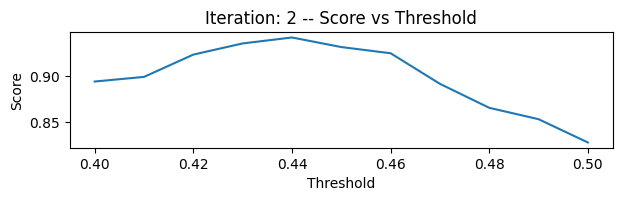

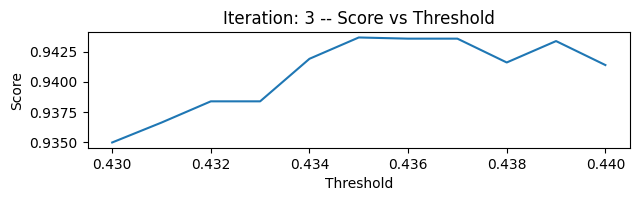

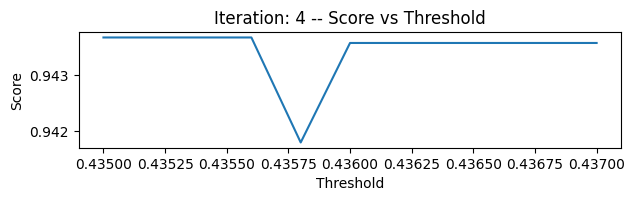

0.4353

In [24]:
from sklearn.metrics import f1_score


best_threshold = tuner.tune_threshold(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba, 
    metric=f1_score,
    average='macro',
    higher_is_better=True,
    max_iterations=5
)


best_threshold

,Metric,1,2,Macro
0,Precision,0.977337,0.900000,0.938669
0,Recall,0.937500,0.962791,0.950145
0,F1,0.957004,0.930337,0.943671


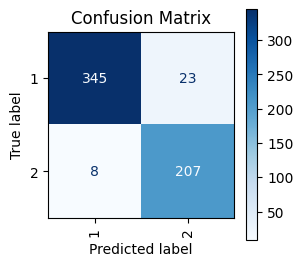

,Metric,Score
0,Brier Score,0.137639
1,AUROC,0.984277


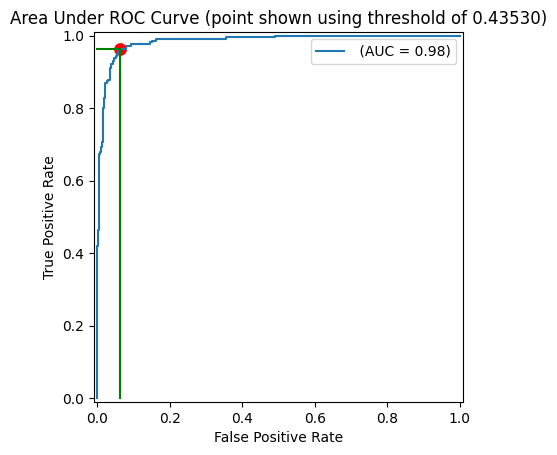

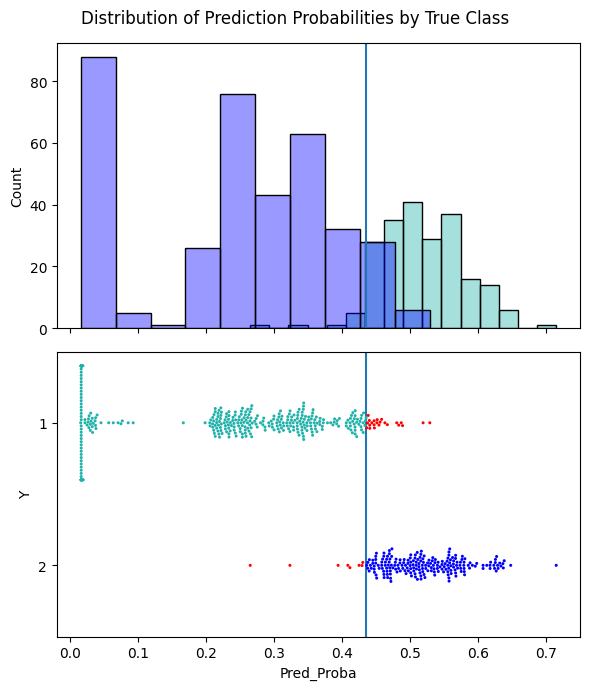

In [25]:
# A pontuação macro da F1 melhorou de 0,788 para 0,956:

tuner.print_stats_proba(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba,
    thresholds=best_threshold
) 

# <font color="gree">phoneme</font>

In [26]:
np.random.seed(0)

data = fetch_openml("phoneme", version=1, parser='auto') 
df = pd.DataFrame(data['data'])

df.head()

,V1,V2,V3,V4,V5
0,0.489927,-0.451528,-1.047990,-0.598693,-0.020418
1,-0.641265,0.109245,0.292130,-0.916804,0.240223
2,0.870593,-0.459862,0.578159,0.806634,0.835248
3,-0.628439,-0.316284,1.934295,-1.427099,-0.136583
4,-0.596399,0.015938,2.043206,-1.688448,-0.948127


In [27]:
df.shape

(5404, 5)

In [28]:
y_true = data['target']
y_true.value_counts()

Class
1    3818
2    1586
Name: count, dtype: int64

In [29]:
target_classes = ['1', '2']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df, y_true, test_size=0.33, random_state=42)

clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)


tuner = ClassificationThresholdTuner()

,Metric,1,2,Macro
0,Precision,0.852021,0.663848,0.757935
0,Recall,0.875392,0.618110,0.746751
0,F1,0.863549,0.640163,0.751856


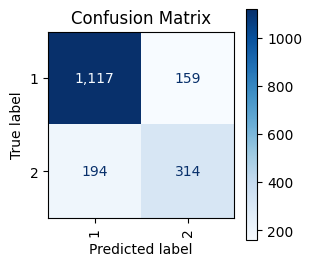

,Metric,Score
0,Brier Score,0.130500
1,AUROC,0.877751


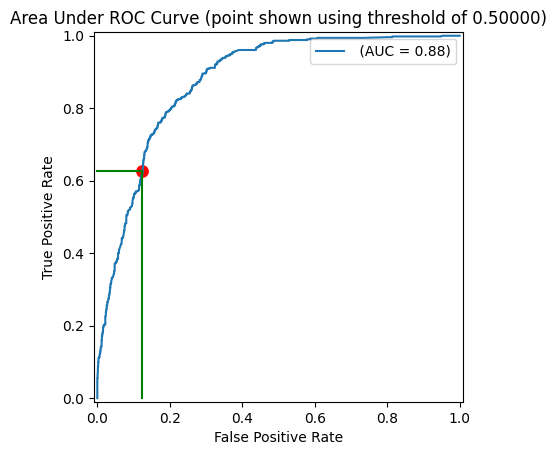

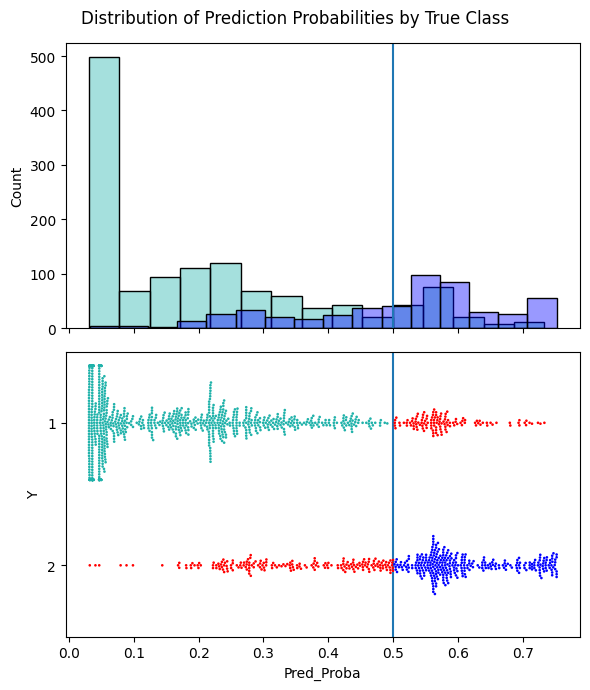

In [31]:
tuner.print_stats_proba(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba,
    default_class=None,
    thresholds=None
)  


,Start Range %,End Range %,Min Probability,Max Probability,Count 1,Count 2,Total Count,Precision,Recall,Cumulative Count 2,Cumulative Total Count,Cumulative Precision,Cumulative Recall
0,0.9,1.0,0.596275,0.752012,40,139,179,0.776536,0.273622,139,179,0.776536,0.273622
1,0.8,0.9,0.553971,0.595844,62,116,178,0.651685,0.228346,255,357,0.714286,0.501969
2,0.7,0.8,0.452833,0.553257,76,103,179,0.575419,0.202756,358,536,0.667910,0.704724
3,0.6,0.7,0.328304,0.452641,116,62,178,0.348315,0.122047,420,714,0.588235,0.826772
4,0.5,0.6,0.244073,0.327868,129,50,179,0.279330,0.098425,470,893,0.526316,0.925197
5,0.4,0.5,0.187904,0.243947,152,26,178,0.146067,0.051181,496,1071,0.463119,0.976378
6,0.3,0.4,0.089885,0.187153,171,7,178,0.039326,0.013780,503,1249,0.402722,0.990157
7,0.2,0.3,0.049770,0.089345,178,2,180,0.011111,0.003937,505,1429,0.353394,0.994094
8,0.1,0.2,0.036132,0.049715,149,2,151,0.013245,0.003937,507,1580,0.320886,0.998031
9,0.0,0.1,0.031040,0.036039,203,1,204,0.004902,0.001969,508,1784,0.284753,1.000000


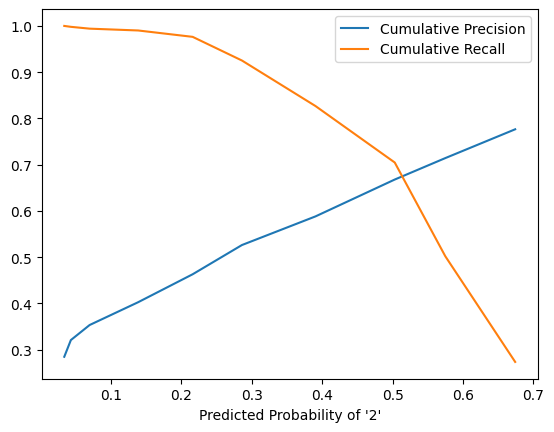

In [32]:
tuner.print_stats_table(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba
)

100%|██████████| 9/9 [00:26<00:00,  2.94s/it]


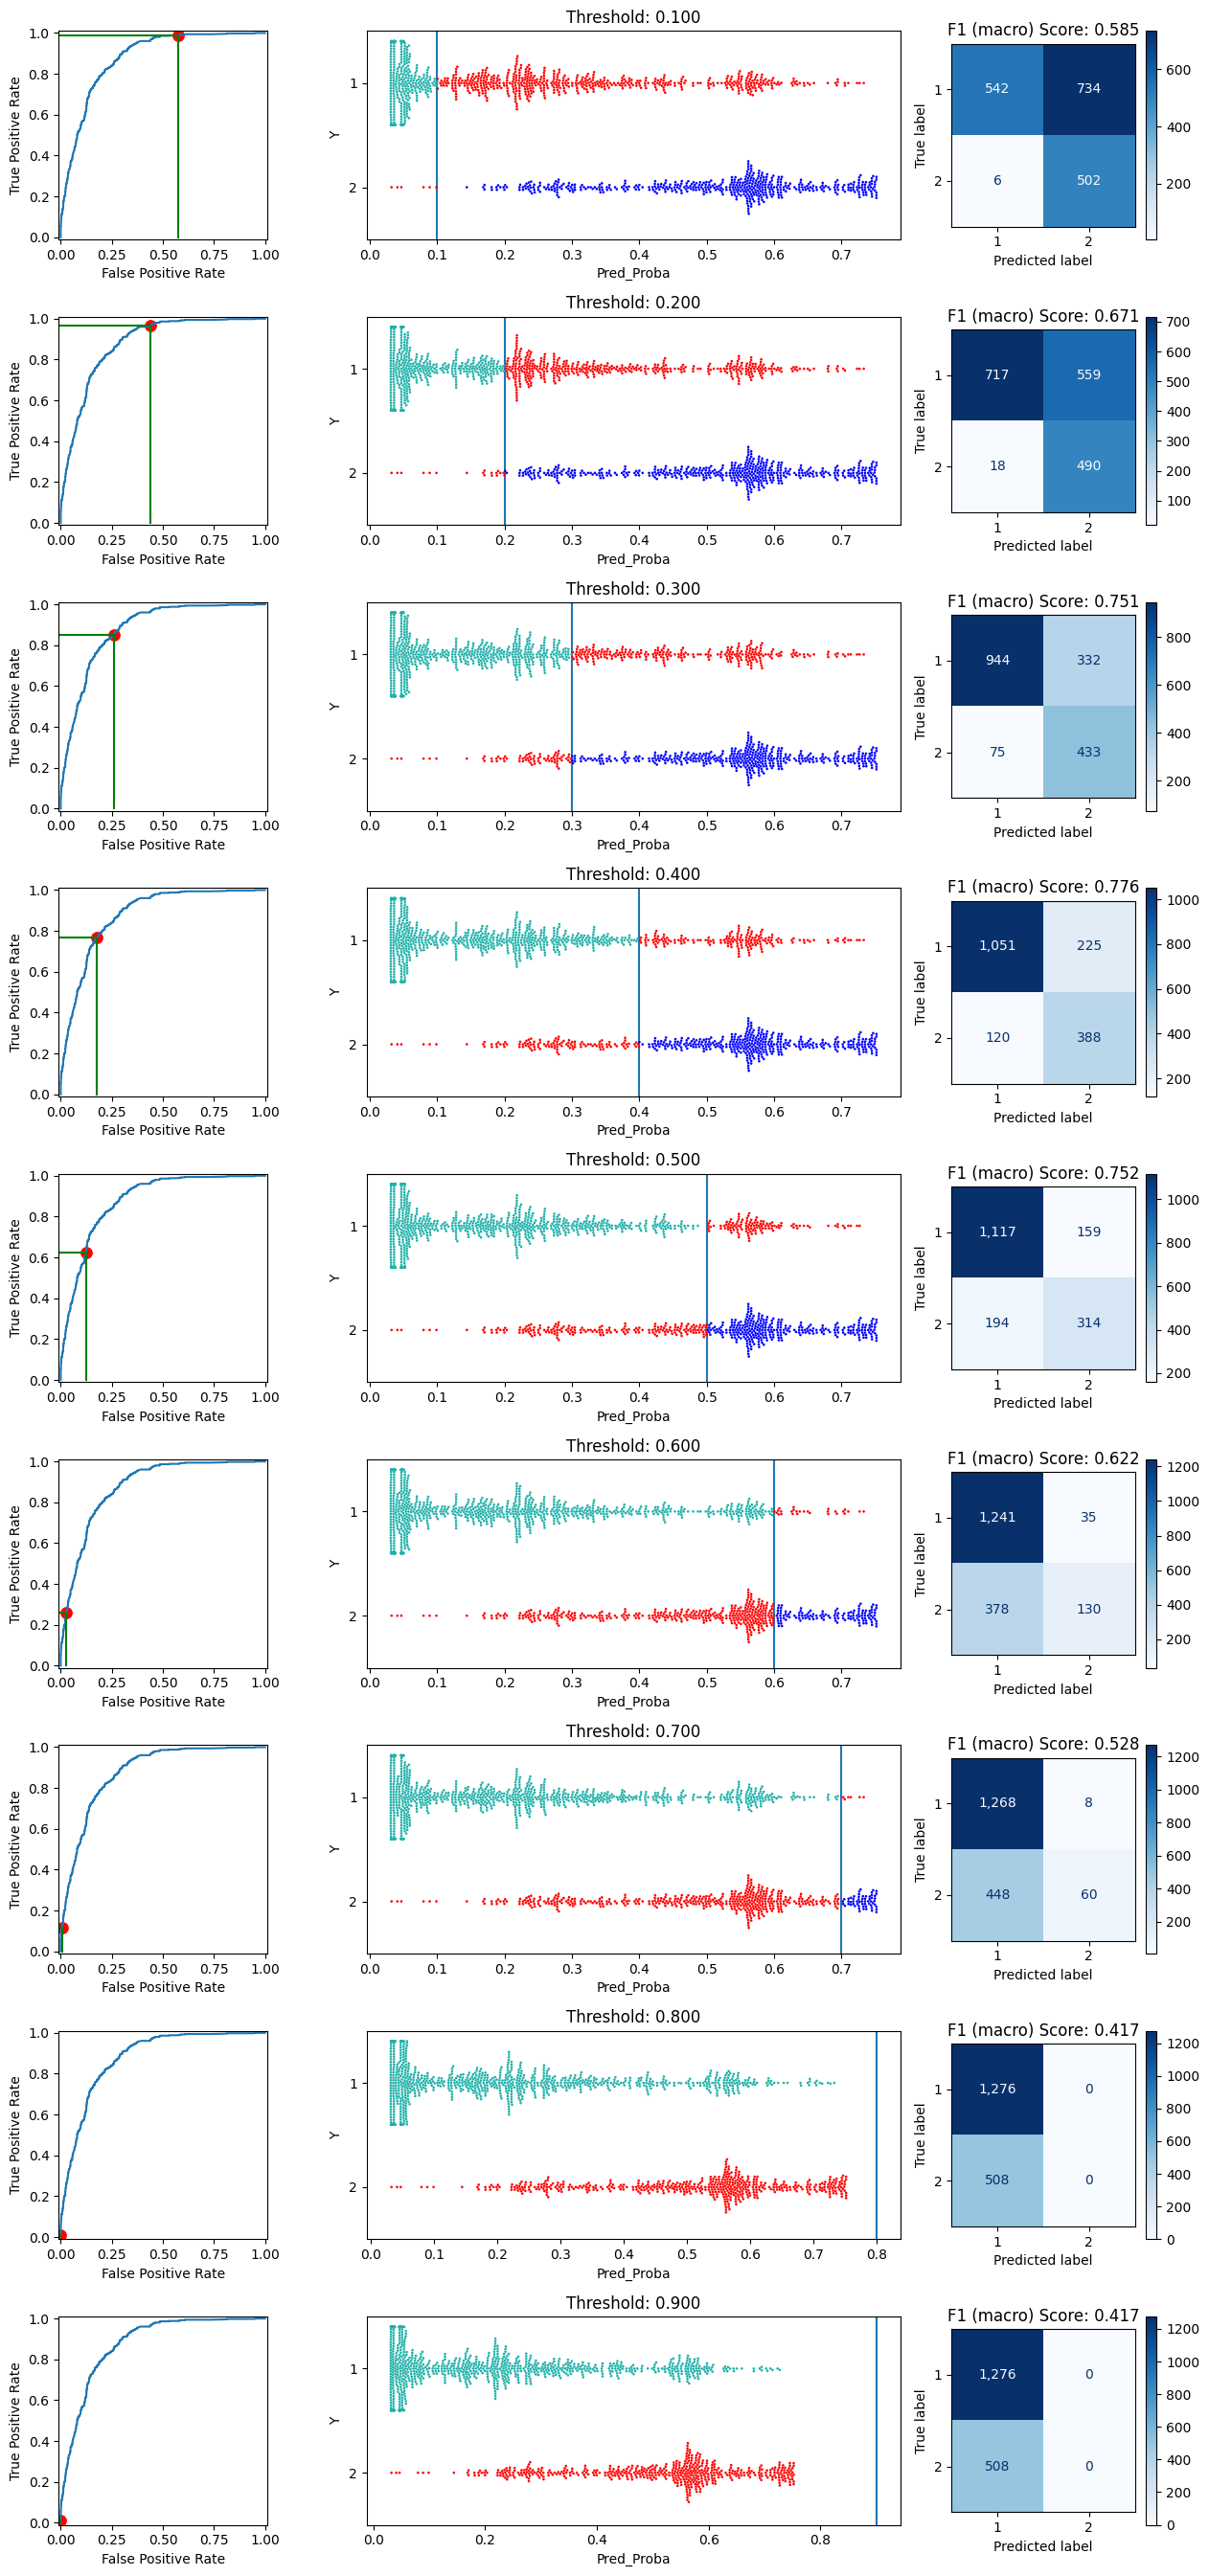

In [33]:
tuner.plot_by_threshold(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba)


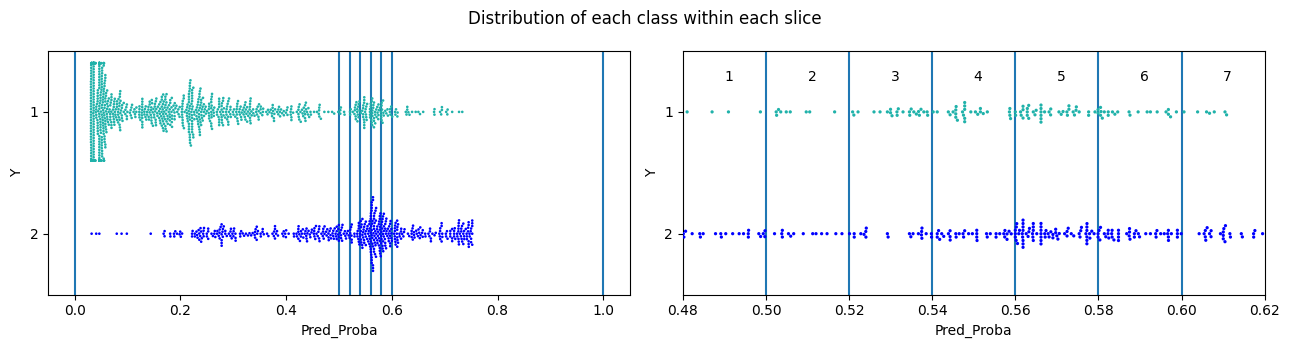

,Slice,Min Prob,Max Prob,1,2,Total,Fraction 1,Fraction 2
0,1,0.00,0.50,1117,194,1311,0.852021,0.147979
1,2,0.50,0.52,9,14,23,0.391304,0.608696
2,3,0.52,0.54,24,21,45,0.533333,0.466667
3,4,0.54,0.56,29,38,67,0.432836,0.567164
4,5,0.56,0.58,41,69,110,0.372727,0.627273
5,6,0.58,0.60,21,42,63,0.333333,0.666667
6,7,0.60,1.00,35,130,165,0.212121,0.787879


In [34]:
tuner.describe_slices(    
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba, 
    start=0.5, end=0.6, num_slices=5)

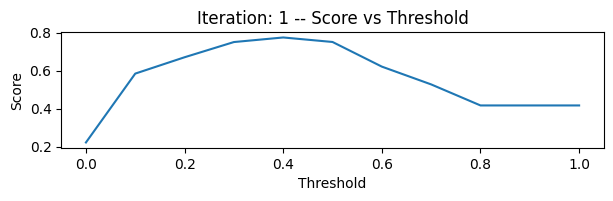

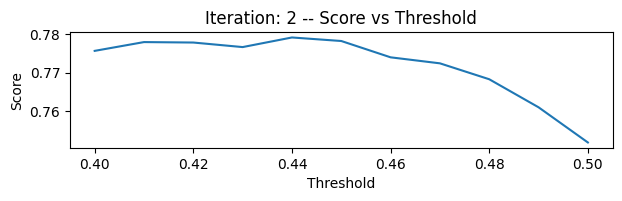

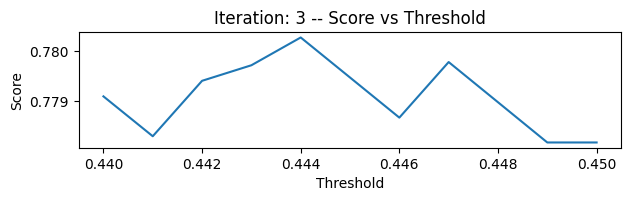

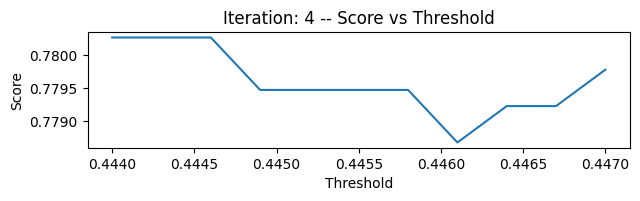

0.44415000000000004

In [35]:
from sklearn.metrics import f1_score

best_threshold = tuner.tune_threshold(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba, 
    metric=f1_score,
    average='macro',
    higher_is_better=True,
    max_iterations=5
)

best_threshold

,Metric,1,2,Macro
0,Precision,0.883065,0.667279,0.775172
0,Recall,0.858150,0.714567,0.786359
0,F1,0.870429,0.690114,0.780272


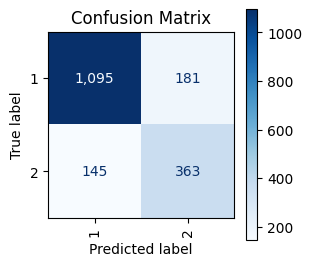

,Metric,Score
0,Brier Score,0.130500
1,AUROC,0.877751


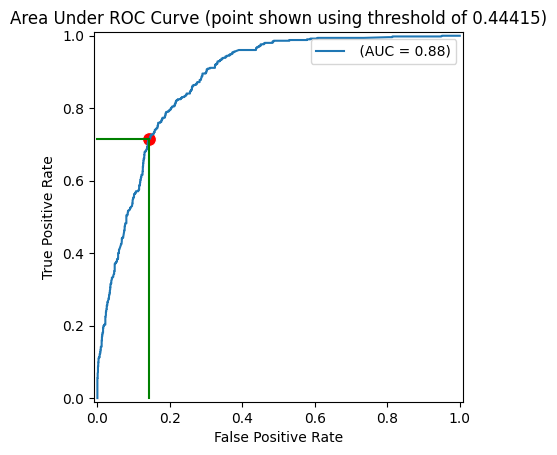

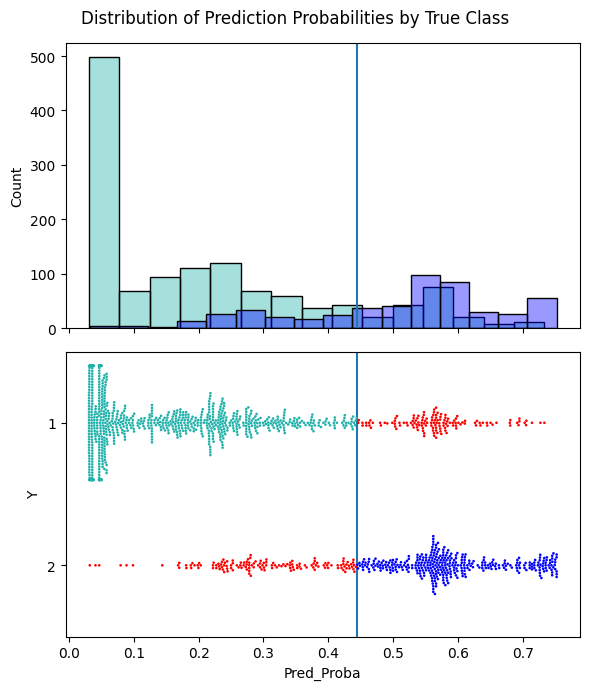

In [36]:
# The F1 macro score improved from about 0.75 to 0.78

tuner.print_stats_proba(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba, 
    thresholds=best_threshold
)

# <font color="gree">Digits dataset</font>

In [37]:
# This is a multiclass dataset. It has no logical default class, though we use '0'
# here, which may be sensible in some scenarios. 

from sklearn.datasets import load_digits

np.random.seed(0)

data = load_digits()
df = pd.DataFrame(data.data)
df.columns = data.feature_names
y_true = data.target


df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [38]:
df.shape

(1797, 64)

In [39]:
target_classes = data.target_names
target_classes


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df, y_true, test_size=0.30, random_state=42)

In [41]:
clf = RandomForestClassifier(max_depth=1, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

In [42]:
tuner = ClassificationThresholdTuner()


,Metric,0,1,2,3,4,5,6,7,8,9,Macro
0,Precision,0.638554,0.857143,0.656250,0.671233,0.836364,1.000000,0.614458,0.600000,0.880000,0.900000,0.765400
0,Recall,1.000000,0.360000,0.893617,0.907407,0.766667,0.393939,0.962264,0.981818,0.511628,0.305085,0.708243
0,F1,0.779412,0.507042,0.756757,0.771654,0.800000,0.565217,0.750000,0.744828,0.647059,0.455696,0.677766


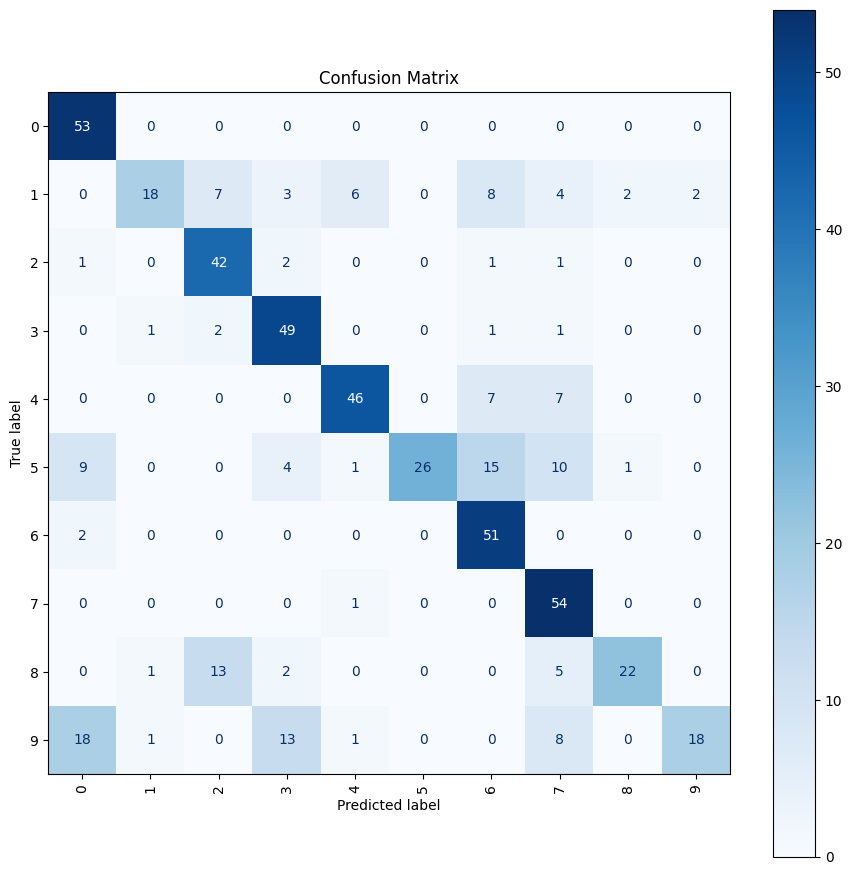

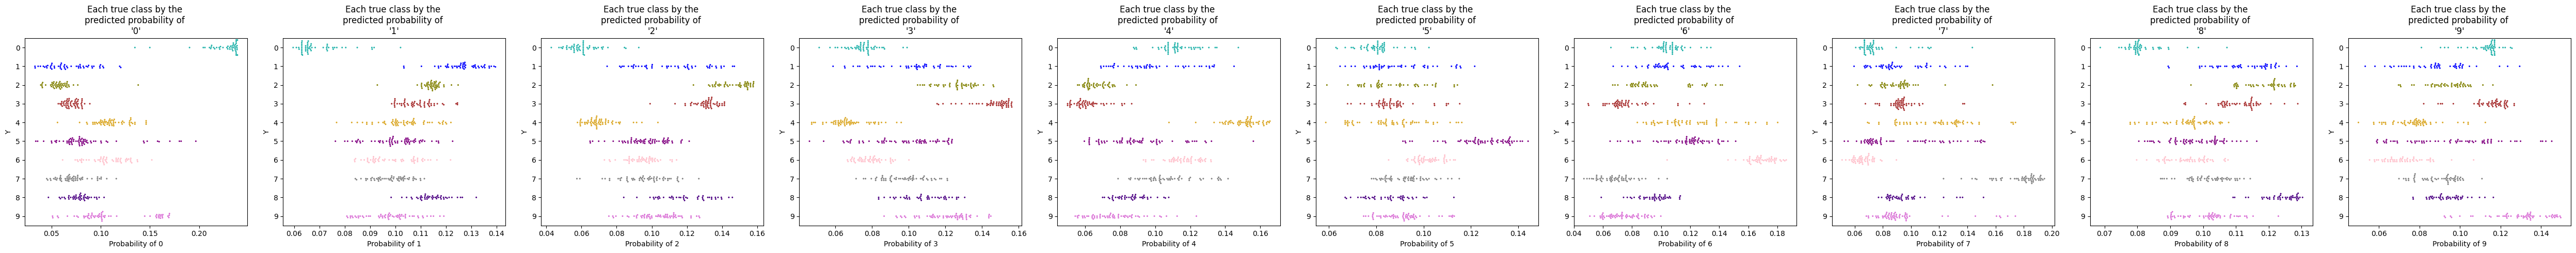

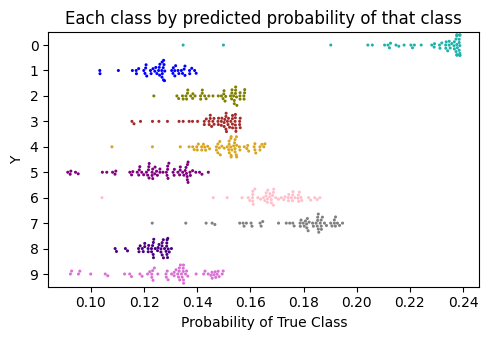

In [43]:
tuner.print_stats_proba(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba,
    default_class=None,
    thresholds=None
) 


In [44]:
from sklearn.metrics import f1_score

best_thresholds = tuner.tune_threshold(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba,
    metric=f1_score,
    average='macro',
    default_class='0',
    max_iterations=5
)

best_thresholds

 40%|████      | 2/5 [00:03<00:05,  1.82s/it]


[0.0, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
tuner.print_stats_proba(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba,
    default_class='0',
    thresholds=best_thresholds
) 